In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_data_path ="~/aiffel/dktc/data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
3948,3948,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...


In [7]:
train_data.isnull().sum()

idx             0
class           0
conversation    0
dtype: int64

In [11]:
train_data['class'].value_counts()

기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: class, dtype: int64

In [30]:
duplicated = train_data[train_data.duplicated()]
duplicated

,idx,class,conversation


In [31]:
conversation_duplicated = train_data[train_data.duplicated(['conversation'])]
conversation_duplicated

,idx,class,conversation
392,392,기타 괴롭힘 대화,병신이 아이스크림 먹게 돼 있냐?\n난 먹으면 안 돼? 그만 좀 해.\n당연히 안 ...
523,523,직장 내 괴롭힘 대화,과장님. 저 이번에 휴가 좀 갔다와도 되겠습니까.?\n휴가? 왜??\n좀 쉬다가 오...
789,789,기타 괴롭힘 대화,야 얘 이 쪽 손가락 세 개밖에 없다\n엥 손가락이 세개밖에 없을 수가 있어?\n봐...
824,824,기타 괴롭힘 대화,이야 내동생 여자친구한테 편지쓰네?\n 아 형 돌려줘.\n 어디보자. 사랑하는 여친...
869,869,직장 내 괴롭힘 대화,지현씨 나 소개팅 좀 시켜줘봐\n네? 저 주변에 아는 사람이 없어서요\n아 상사라 ...
...,...,...,...
3797,3797,기타 괴롭힘 대화,너 이번 방학 때 쌍꺼풀 수술 하고왔지?\n아닌데?\n아니긴 뭐가 아니야. 눈이 이...
3798,3798,기타 괴롭힘 대화,안녕하세요 지금 먹방 촬영중인데 촬영가능할까요?\n안돼요\n한번만 안될까요?\n안돼...
3855,3855,기타 괴롭힘 대화,그 소문 진짜야? 너가 다른 애들 뒷담화하고 다녔다며?\n응? 나 그런 적 없는데?...
3874,3874,기타 괴롭힘 대화,야 니 왤캐 못생겼냐?\n뭐라그랬냐?\n으 나 보고 말하지마 니 얼굴보면 토나올거 ...


In [34]:
conversation_duplicated = train_data[train_data.duplicated(['conversation', 'class'])]
conversation_duplicated

,idx,class,conversation
392,392,기타 괴롭힘 대화,병신이 아이스크림 먹게 돼 있냐?\n난 먹으면 안 돼? 그만 좀 해.\n당연히 안 ...
523,523,직장 내 괴롭힘 대화,과장님. 저 이번에 휴가 좀 갔다와도 되겠습니까.?\n휴가? 왜??\n좀 쉬다가 오...
789,789,기타 괴롭힘 대화,야 얘 이 쪽 손가락 세 개밖에 없다\n엥 손가락이 세개밖에 없을 수가 있어?\n봐...
824,824,기타 괴롭힘 대화,이야 내동생 여자친구한테 편지쓰네?\n 아 형 돌려줘.\n 어디보자. 사랑하는 여친...
869,869,직장 내 괴롭힘 대화,지현씨 나 소개팅 좀 시켜줘봐\n네? 저 주변에 아는 사람이 없어서요\n아 상사라 ...
...,...,...,...
3797,3797,기타 괴롭힘 대화,너 이번 방학 때 쌍꺼풀 수술 하고왔지?\n아닌데?\n아니긴 뭐가 아니야. 눈이 이...
3798,3798,기타 괴롭힘 대화,안녕하세요 지금 먹방 촬영중인데 촬영가능할까요?\n안돼요\n한번만 안될까요?\n안돼...
3855,3855,기타 괴롭힘 대화,그 소문 진짜야? 너가 다른 애들 뒷담화하고 다녔다며?\n응? 나 그런 적 없는데?...
3874,3874,기타 괴롭힘 대화,야 니 왤캐 못생겼냐?\n뭐라그랬냐?\n으 나 보고 말하지마 니 얼굴보면 토나올거 ...


In [35]:
for idx, d in enumerate(train_data.iterrows()):
    for jdx, d2 in enumerate(train_data.iterrows()):
        if idx != jdx and d[1]['conversation'] == d2[1]['conversation']:
            print(d[1]['class'], ':', d[1]['conversation'].split('\n')[0])
            print(d2[1]['class'], ':', d2[1]['conversation'].split('\n')[0])

기타 괴롭힘 대화 : 병신이 아이스크림 먹게 돼 있냐?
기타 괴롭힘 대화 : 병신이 아이스크림 먹게 돼 있냐?
기타 괴롭힘 대화 : 니가 나 따라한다는 애구나?
기타 괴롭힘 대화 : 니가 나 따라한다는 애구나?
기타 괴롭힘 대화 : 야 손병신.
기타 괴롭힘 대화 : 야 손병신.
기타 괴롭힘 대화 : 야 니 왤캐 못생겼냐?
기타 괴롭힘 대화 : 야 니 왤캐 못생겼냐?
기타 괴롭힘 대화 : 너 일로 따라와봐.
기타 괴롭힘 대화 : 너 일로 따라와봐.
기타 괴롭힘 대화 : 저기요. 잠깐만요
기타 괴롭힘 대화 : 저기요. 잠깐만요
직장 내 괴롭힘 대화 : 과장님. 저 이번에 휴가 좀 갔다와도 되겠습니까.?
직장 내 괴롭힘 대화 : 과장님. 저 이번에 휴가 좀 갔다와도 되겠습니까.?
갈취 대화 : 어이 이리 와봐. 
갈취 대화 : 어이 이리 와봐. 
기타 괴롭힘 대화 : 야. 찐따야 오늘도 나왔네?
기타 괴롭힘 대화 : 야. 찐따야 오늘도 나왔네?
기타 괴롭힘 대화 : 으 냄새나
기타 괴롭힘 대화 : 으 냄새나
기타 괴롭힘 대화 : 야 시발 왜 혼자 공부하냐
기타 괴롭힘 대화 : 야 시발 왜 혼자 공부하냐
기타 괴롭힘 대화 : 어 누구 닮은셧는데 ?
기타 괴롭힘 대화 : 어 누구 닮은셧는데 ?
기타 괴롭힘 대화 : 여행 누구랑 다녀왔어요?
기타 괴롭힘 대화 : 여행 누구랑 다녀왔어요?
기타 괴롭힘 대화 : 병신이 아이스크림 먹게 돼 있냐?
기타 괴롭힘 대화 : 병신이 아이스크림 먹게 돼 있냐?
직장 내 괴롭힘 대화 : 우리 신입이 이번 대회에서 1등 했어요.
직장 내 괴롭힘 대화 : 우리 신입이 이번 대회에서 1등 했어요.
직장 내 괴롭힘 대화 : 과장님. 저 이번에 휴가 좀 갔다와도 되겠습니까.?
직장 내 괴롭힘 대화 : 과장님. 저 이번에 휴가 좀 갔다와도 되겠습니까.?
기타 괴롭힘 대화 : 생긴 것 봐라. 니네 부모님은 무슨 잘못을 하셔서 이런 자식을 낳으셨냐
기타 괴롭힘 대화 : 생긴 것 봐라. 니네 부모님은 무슨 잘못을 하셔서 이런 자식을 낳으셨냐
기타 괴롭힘

기타 괴롭힘 대화 : 원숭이 엉덩이는 빨개 빨가면 사과 사과는 맛있어 맛있으면 바나나 야 홍당무 사과는 맛있는데 왜 바나나냐?
기타 괴롭힘 대화 : 원숭이 엉덩이는 빨개 빨가면 사과 사과는 맛있어 맛있으면 바나나 야 홍당무 사과는 맛있는데 왜 바나나냐?
기타 괴롭힘 대화 : 야 찐따야.
기타 괴롭힘 대화 : 야 찐따야.
갈취 대화 : 100만원만 어떻게 해주라.
갈취 대화 : 100만원만 어떻게 해주라.
기타 괴롭힘 대화 : 푸핫 야 너 배좀 봐 밥이 들어가니?
기타 괴롭힘 대화 : 푸핫 야 너 배좀 봐 밥이 들어가니?
기타 괴롭힘 대화 : 야 너가 그걸 할 수 있냐?
기타 괴롭힘 대화 : 야 너가 그걸 할 수 있냐?
기타 괴롭힘 대화 : 야 석탄?
기타 괴롭힘 대화 : 야 석탄?
기타 괴롭힘 대화 : 똑바로 서! 최일병!
기타 괴롭힘 대화 : 똑바로 서! 최일병!
협박 대화 : 좋은 말로 할 때 나랑 사귀는걸로 해
협박 대화 : 좋은 말로 할 때 나랑 사귀는걸로 해
기타 괴롭힘 대화 : 저기 혹시 죄송한데 리뷰이벤트를 해주시기로 했는데 안해주셔서 연락드렸습니다.
기타 괴롭힘 대화 : 저기 혹시 죄송한데 리뷰이벤트를 해주시기로 했는데 안해주셔서 연락드렸습니다.
기타 괴롭힘 대화 : 야 저 찐따새끼 지나간다
기타 괴롭힘 대화 : 야 저 찐따새끼 지나간다
기타 괴롭힘 대화 : 내일까지 레벨 몇 만들어와
기타 괴롭힘 대화 : 내일까지 레벨 몇 만들어와
기타 괴롭힘 대화 : 대체 왜 나를 이렇게 괴롭히는거야?
기타 괴롭힘 대화 : 대체 왜 나를 이렇게 괴롭히는거야?
기타 괴롭힘 대화 : 나 숙제 좀 대신 해주라.
기타 괴롭힘 대화 : 나 숙제 좀 대신 해주라.
기타 괴롭힘 대화 : 야 대머리 독수리 니 머리카락 어디갔냐
기타 괴롭힘 대화 : 야 대머리 독수리 니 머리카락 어디갔냐
갈취 대화 : 야 너 오늘 틴트 잘발렸다. 무슨 틴트야?
갈취 대화 : 야 너 오늘 틴트 잘발렸다. 무슨 틴트야?
기타 괴롭힘 대화 : 야. 찐따야 오늘도 나왔네?
기타 괴롭힘 대화 : 야.

In [39]:
train_data = train_data.drop_duplicates('conversation')
len(train_data)

3846

In [50]:
def sen_length(sen):
    return len(sen.split('\n'))

def word_length(sen):
    return len(sen.replace('\n', ' ').split(' '))

train_data['sen_length'] = train_data['conversation'].apply(sen_length)
train_data['word_length'] = train_data['conversation'].apply(word_length)

/tmp/ipykernel_687/2495049829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sen_length'] = train_data['conversation'].apply(sen_length)
/tmp/ipykernel_687/2495049829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['word_length'] = train_data['conversation'].apply(word_length)


최소 길이 : 5
최대 길이 : 25
평균 길이 : 10.362714508580343


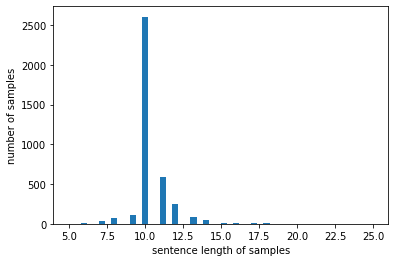

In [51]:
print('최소 길이 :', min(w for w in train_data['sen_length']))
print('최대 길이 :', max(w for w in train_data['sen_length']))
print('평균 길이 :', sum(train_data['sen_length']) / len(train_data))
plt.hist([w for w in train_data['sen_length']], bins=50)
plt.xlabel('sentence length of samples')
plt.ylabel('number of samples')
plt.show()

최소 길이 : 10
최대 길이 : 223
평균 길이 : 59.37467498699948


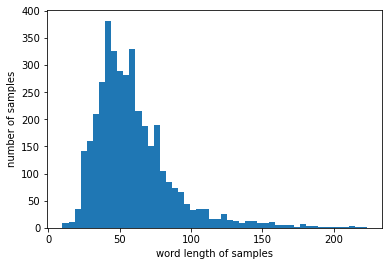

In [52]:
print('최소 길이 :', min(w for w in train_data['word_length']))
print('최대 길이 :', max(w for w in train_data['word_length']))
print('평균 길이 :', sum(train_data['word_length']) / len(train_data))
plt.hist([w for w in train_data['word_length']], bins=50)
plt.xlabel('word length of samples')
plt.ylabel('number of samples')
plt.show()